In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/xgboost_v7/V7_data_after_EDA.xlsx')

In [ ]:
data.shape

(3138, 29)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   OpportunityID                          3138 non-null   object 
 1   Renewal_PreviousPace                   3138 non-null   float64
 2   Renewal_PreviousPaidPercentageOfRTR    3138 non-null   float64
 3   Renewal_CountPreviousDeals             3138 non-null   int64  
 4   Renewal_PreviousCountBounces           3138 non-null   int64  
 5   Renewal_PreviousPosition               3138 non-null   int64  
 6   Renewal_PreviousHBwLCF                 3138 non-null   float64
 7   Renewal_PreviousAvgMonthRevenue        3138 non-null   float64
 8   Renewal_PreviousAvgDailyBalance        3138 non-null   float64
 9   Renewal_TwoWeekBounces                 3138 non-null   int64  
 10  NumberOfBankStatements                 3138 non-null   int64  
 11  Bank

In [ ]:
data.corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                     -0.107839
Renewal_CountPreviousDeals              -0.083737
Renewal_PreviousPaidPercentageOfRTR     -0.059994
Credit_Score__c                         -0.059195
NumberOfBankStatements                  -0.026291
PctChangeInReveune                      -0.026277
HB_with_LCF_Payment__c                  -0.020569
PctAvgDailybalance2AvgMonthlyDeposits   -0.016294
Renewal_PreviousHBwLCF                  -0.016076
Renewal_PreviousPace                    -0.005916
AvgDailybalance                         -0.000262
Renewal_PreviousPosition                 0.000579
Is_this_Business_home_based__c_Yes       0.005318
AvgMonthlydeposits                       0.007596
BankStatement_MA_NumReturnItems          0.008192
Renewal_PreviousCountBounces             0.019357
Avg_ReturnItemdays                       0.019896
FundedAmount                             0.021570
Renewal_PreviousAvgDailyBalance          0.022551
Paybackamount                            0.024125


In [ ]:
data.drop(['NetWO','FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance'],axis = 1).corr()['WriteOff_YN'].sort_values()

Time_in_Business__c                     -0.107839
Renewal_CountPreviousDeals              -0.083737
Renewal_PreviousPaidPercentageOfRTR     -0.059994
Credit_Score__c                         -0.059195
NumberOfBankStatements                  -0.026291
PctChangeInReveune                      -0.026277
HB_with_LCF_Payment__c                  -0.020569
PctAvgDailybalance2AvgMonthlyDeposits   -0.016294
Renewal_PreviousHBwLCF                  -0.016076
Renewal_PreviousPace                    -0.005916
AvgDailybalance                         -0.000262
Renewal_PreviousPosition                 0.000579
Is_this_Business_home_based__c_Yes       0.005318
AvgMonthlydeposits                       0.007596
BankStatement_MA_NumReturnItems          0.008192
Renewal_PreviousCountBounces             0.019357
Avg_ReturnItemdays                       0.019896
FundedAmount                             0.021570
Renewal_PreviousAvgDailyBalance          0.022551
Paybackamount                            0.024125


In [ ]:
data.shape

(3138, 29)

### Model Training

In [ ]:
# X = data.drop(['WriteOff_YN','Industry','Industry_Group__c','OpportunityID',
#               'FundedWriteOffAmount_Net','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyRevenue',
#               'LatestMonth_ReturnItemDays','Avg_ReturnItemdays'],axis = 1)
# y = data['WriteOff_YN']

In [ ]:
X = data.drop(['WriteOff_YN','OpportunityID','FundedWriteOffAmount_Gross',
              'NetWO','PctChangeInReveune','PctAvgDailybalance2AvgMonthlyDeposits',
              'LatestMonth_ReturnItemDays','Avg_ReturnItemdays', 'WOGross_AdvanceBalance'],axis = 1)
y = data['WriteOff_YN']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Renewal_PreviousPace                 3138 non-null   float64
 1   Renewal_PreviousPaidPercentageOfRTR  3138 non-null   float64
 2   Renewal_CountPreviousDeals           3138 non-null   int64  
 3   Renewal_PreviousCountBounces         3138 non-null   int64  
 4   Renewal_PreviousPosition             3138 non-null   int64  
 5   Renewal_PreviousHBwLCF               3138 non-null   float64
 6   Renewal_PreviousAvgMonthRevenue      3138 non-null   float64
 7   Renewal_PreviousAvgDailyBalance      3138 non-null   float64
 8   Renewal_TwoWeekBounces               3138 non-null   int64  
 9   NumberOfBankStatements               3138 non-null   int64  
 10  BankStatement_MA_OverdraftDays       3138 non-null   float64
 11  BankStatement_MA_NumReturnItem

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
print('Shape of x_train is: {}'.format(X_train.shape))
print('Shape of x_test is: {}'.format(X_test.shape))
print('----------------------------------------------')
print('Shape of y_train is: {}'.format(y_train.shape))
print('Shape of y_test is: {}'.format(y_test.shape))

Shape of x_train is: (2510, 20)
Shape of x_test is: (628, 20)
----------------------------------------------
Shape of y_train is: (2510,)
Shape of y_test is: (628,)


In [ ]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_train).count(1)/len(y_train))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_train).count(0)/len(y_train)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


In [ ]:
#checking the skewness
print('Percentage of  having WriteOFF_YN = 1: {}%'.format(np.round((list(y_test).count(1)/len(y_test))*100)))
print('Percentage of  having WriteOFF_YN = 0: {}%'.format(np.round(list(y_test).count(0)/len(y_test)*100)))

Percentage of  having WriteOFF_YN = 1: 26.0%
Percentage of  having WriteOFF_YN = 0: 74.0%


#XGBoost Parameters Explanation


1.   eta - Learning rate - Prevents overfitting - Default = 0.3 - Range = [0,1]
2.   gamma - min_split_loss - Min loss reduction for a further partition - default = 0 - range = [0,infinity] (Higher gamma value means smaller loss reduction which means more splits. As a result, more conservative model,chances of improvement in accuracy.Higher values can also cause overfitting).
3.  lambda - L2 regularisation - default=1 - Higher value means more conservative model, likely to overfit
4. alpha - L1 regularization - default=0 - Higher values lead to more conservative model, likely to overfit
5. scale_pos_weight - default=1 - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative instances) / sum(positive instances).









In [ ]:
# quantile_1 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.25)
# quantile_1

In [ ]:
# quantile_2 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.5)
# quantile_2

In [ ]:
# quantile_3 = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].quantile(0.75)
# quantile_3

In [ ]:
# weight = []
# for i in data.index:
#   if data['WriteOff_YN'][i] == 0:
#     weight.append(1.0)
#   else:
#     if data['FundedWriteOffAmount_Gross'][i] < quantile_1:
#       weight.append(1.25)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_1 and data['FundedWriteOffAmount_Gross'][i] < quantile_2:
#       weight.append(1.5)
#     elif data['FundedWriteOffAmount_Gross'][i] >= quantile_2 and data['FundedWriteOffAmount_Gross'][i] < quantile_3:
#       weight.append(2.0)
#     else:
#       weight.append(2.25)

# weight = np.array(weight)
# len(weight)

In [ ]:
# data[(data['FundedWriteOffAmount_Gross'] >= quantile_2) & (data['FundedWriteOffAmount_Gross'] < quantile_3)]

In [ ]:
median_WO = data[data['WriteOff_YN'] == 1]['FundedWriteOffAmount_Gross'].median()
median_WO

3530.0

In [ ]:
weight = []
for i in data.index:
  if data['FundedWriteOffAmount_Gross'][i] > median_WO:
    weight.append(2)
  else:
    weight.append(1)
weight = np.array(weight)
len(weight)

3138

In [ ]:
# L1 = 0
# L2 = 10
# lr = 0.3

In [ ]:
parameters = {
    'eval_metric':['aucpr'],
    'use_label_encoder':[False],
    'n_estimators':[1,5,10,15,20,25,30,40], # number of decision trees used in Xgboost model
    'scale_pos_weight': [1,2,3,4,5,6,7,8,9,10], # used to tackle unbalanced datasets(same as upsampling, SMOTE,etc)
    'subsample':[0.3,0.75], # how much % of data you are taking for estimator building.
    'reg_alpha':[0],
    'reg_lambda':[1], #perform L2 regularization on leaf weights(tackle overfitting)(control how deep a tree can grow)
    'learning_rate':[0.3], # Learning rate(new weight updation after every epoch in a conservative manner)
    'gamma':[0.25], #Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
    'colsample_bytree':[1],
    'colsample_bylevel':[1],
    'colsample_bynode':[1]
}

In [ ]:
from datetime import datetime as dt
start = dt.now()
x_cfl = XGBClassifier(objective='binary:logistic') #initializing xgboost model

clf = GridSearchCV(estimator=x_cfl,
                   param_grid=parameters,
                   scoring='roc_auc',
                   n_jobs=-1,
                   cv=5,
                   return_train_score=True)

clf.fit(X_train,y_train,sample_weight = weight)
running_secs = (dt.now() - start).seconds
running_secs

32

In [ ]:
# best parameters after training
clf.best_estimator_

XGBClassifier(eval_metric='aucpr', gamma=0.25, learning_rate=0.3,
              n_estimators=10, scale_pos_weight=2, subsample=0.75,
              use_label_encoder=False)

In [ ]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': 'aucpr',
 'gamma': 0.25,
 'learning_rate': 0.3,
 'n_estimators': 10,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 2,
 'subsample': 0.75,
 'use_label_encoder': False}

In [ ]:
predict_y_test = clf.predict(X_test)
predict_y_proba_test = clf.predict_proba(X_test)
predict_y_train = clf.predict(X_train)
predict_y_proba_train = clf.predict_proba(X_train)

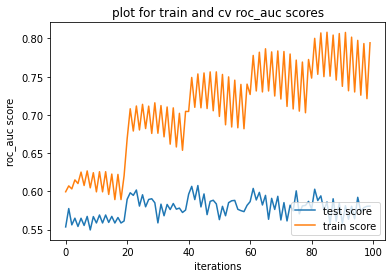

In [ ]:
#here test score refers to the cv score
x_axis = [i for i in range(100)]
plt.plot(x_axis,clf.cv_results_['mean_test_score'][:100])
plt.plot(x_axis,clf.cv_results_['mean_train_score'][:100])
plt.legend(["test score", "train score"], loc ="lower right")
plt.xlabel('iterations')
plt.ylabel('roc_auc score')
plt.title('plot for train and cv roc_auc scores')
plt.show()

In [ ]:
from sklearn.metrics import precision_score,recall_score

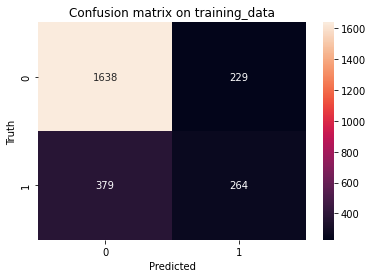

----------------------------
TP: 264
TN: 1638
FP: 229
FN: 379
F1-score: 0.4647887323943662
accuracy: 0.7577689243027889
Precision: 0.5354969574036511
Recall: 0.4105754276827372


In [ ]:
# on training data
sns.heatmap(confusion_matrix(y_train,predict_y_train), annot=True, fmt='d')
plt.title('Confusion matrix on training_data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_train, predict_y_train).ravel()
print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))


print('F1-score: {}'.format(f1_score(predict_y_train,y_train)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_train,predict_y_train)))
print('Recall: {}'.format(recall_score(y_train,predict_y_train)))

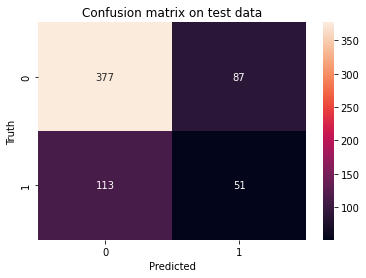

----------------------------
----------------------------
TP: 51
TN: 377
FP: 87
FN: 113
----------------------------
F1-score: 0.33774834437086093
accuracy: 0.6815286624203821
Precision: 0.3695652173913043
Recall: 0.31097560975609756


In [ ]:
# on test set
sns.heatmap(confusion_matrix(y_test,predict_y_test), annot=True, fmt='d')
plt.title('Confusion matrix on test data')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
print("----------------------------")

tn, fp, fn, tp = confusion_matrix(y_test,predict_y_test).ravel()
print("----------------------------")

print('TP: {}'.format(tp))
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print("----------------------------")

print('F1-score: {}'.format(f1_score(y_test,predict_y_test)))
print('accuracy: {}'.format((tp+tn)/(tp+tn+fp+fn)))
print('Precision: {}'.format(precision_score(y_test,predict_y_test)))
print('Recall: {}'.format(recall_score(y_test,predict_y_test)))

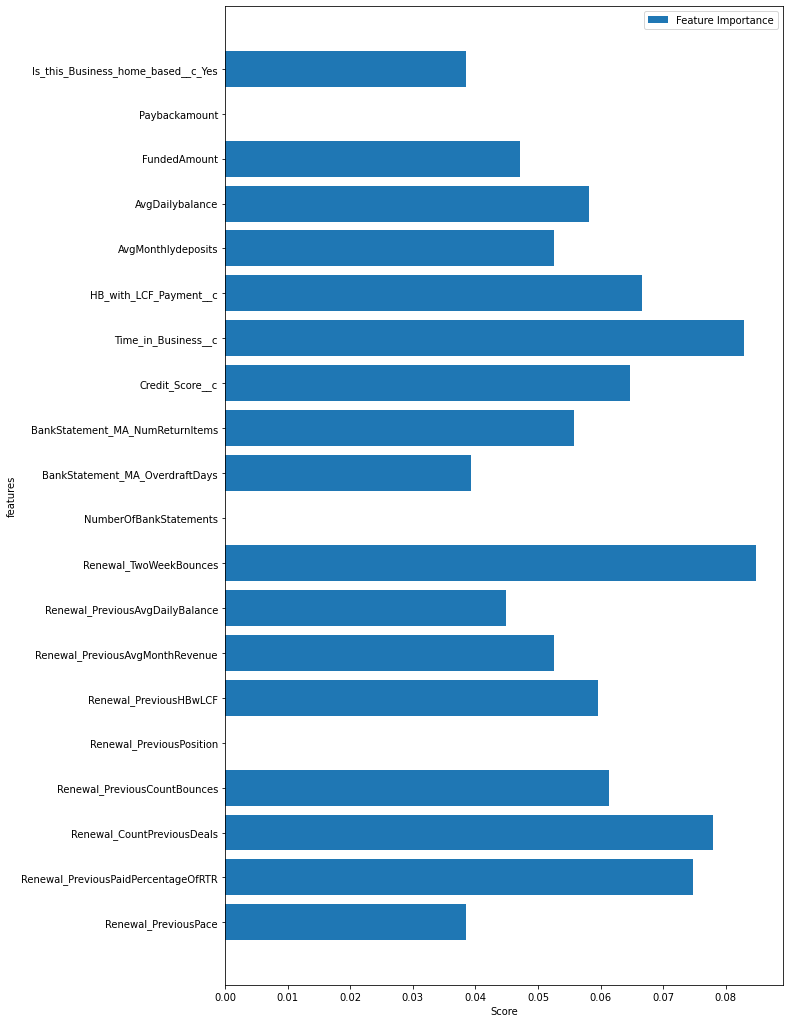

In [ ]:
# check for feature importance
features = X_train.columns
features
gain = clf.best_estimator_.feature_importances_
plt.figure(figsize = (10, 18))
plt.barh(features , gain)
plt.xlabel("Score")
plt.ylabel("features")
plt.legend(["Feature Importance"])
plt.show()

In [ ]:
#converting this into a dataframe as y_test is a series {we get retained indexes}
check = pd.DataFrame(y_train)
check

,WriteOff_YN
2784,0
1791,0
2825,0
1057,0
221,1
...,...
3092,1
1095,0
1130,1
1294,0


In [ ]:
check['Predicted Values'] = predict_y_train

In [ ]:
check

,WriteOff_YN,Predicted Values
2784,0,0
1791,0,0
2825,0,0
1057,0,0
221,1,0
...,...,...
3092,1,0
1095,0,0
1130,1,0
1294,0,0


In [ ]:
predict_y_proba_train

array([[0.76923686, 0.23076314],
       [0.748127  , 0.25187302],
       [0.63287556, 0.3671244 ],
       ...,
       [0.672107  , 0.327893  ],
       [0.75178444, 0.24821553],
       [0.78253675, 0.21746323]], dtype=float32)

In [ ]:
write_off1 = []
for i in predict_y_proba_train:
  write_off1.append(i[1])


In [ ]:
check['Predicted_Prob_WO = 1'] = write_off1

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1
2784,0,0,0.230763
1791,0,0,0.251873
2825,0,0,0.367124
1057,0,0,0.271689
221,1,0,0.298712
...,...,...,...
3092,1,0,0.362651
1095,0,0,0.196520
1130,1,0,0.327893
1294,0,0,0.248216


In [ ]:
check['OpportunityID'] = None

In [ ]:
for i in check.index:
  check['OpportunityID'][i] = data['OpportunityID'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID
2784,0,0,0.230763,0062M00000gYsKAQA0
1791,0,0,0.251873,0062M00000lvAjNQAU
2825,0,0,0.367124,0062M00000lpzJEQAY
1057,0,0,0.271689,0062M00000mg97hQAA
221,1,0,0.298712,0062M00000iaREXQA2
...,...,...,...,...
3092,1,0,0.362651,0062M00000nWutvQAC
1095,0,0,0.196520,0062M00000n2XHKQA2
1130,1,0,0.327893,0062M00000n1B18QAE
1294,0,0,0.248216,0062M00000npSurQAE


In [ ]:
print("Max_propability_value: ", check["Predicted_Prob_WO = 1"].max())
print("Min_propability_value: ", check["Predicted_Prob_WO = 1"].min())

Max_propability_value:  0.8743657
Min_propability_value:  -0.050678432


Max_Probabilty - 0.89, Min_Probabilty - 0.15 - 0 percentile value
Explaination - In the range of 0 to 1, .89 - 100 percentile value

How deciles are made:
1) 10 deciles are formed based on the distribution of quantiles - we need to break percentile into 10 bins

In [ ]:
check['Decile'] = None

In [ ]:
funded_amt_d1, funded_amt_d2, funded_amt_d3, funded_amt_d4, funded_amt_d5, funded_amt_d6, funded_amt_d7, funded_amt_d8, funded_amt_d9, funded_amt_d10 = 0,0,0,0,0,0,0,0,0,0
gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10 = 0,0,0,0,0,0,0,0,0,0

for i in check.index:

  if check["Predicted_Prob_WO = 1"][i]>check["Predicted_Prob_WO = 1"].quantile(0.90):
    d=10
    funded_amt_d10 = funded_amt_d10+data['FundedAmount'][i]
    gross_amt_d10 = gross_amt_d10 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.80)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.90)):
    d=9
    funded_amt_d9 = funded_amt_d9+data['FundedAmount'][i]
    gross_amt_d9 = gross_amt_d9 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.70)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.80)):
    d=8
    funded_amt_d8 = funded_amt_d8+data['FundedAmount'][i]
    gross_amt_d8 = gross_amt_d8 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.60)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.70)):
    d=7
    funded_amt_d7 = funded_amt_d7+data['FundedAmount'][i]
    gross_amt_d7 = gross_amt_d7 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.50)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.60)):
    d=6
    funded_amt_d6 = funded_amt_d6+data['FundedAmount'][i]
    gross_amt_d6 = gross_amt_d6+ data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.40)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.50)):
    d=5
    funded_amt_d5 = funded_amt_d5+data['FundedAmount'][i]
    gross_amt_d5 = gross_amt_d5 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.30)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.40)):
    d=4
    funded_amt_d4 = funded_amt_d4+data['FundedAmount'][i]
    gross_amt_d4 = gross_amt_d4 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.20)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.30)):
    d=3
    funded_amt_d3 = funded_amt_d3+data['FundedAmount'][i]
    gross_amt_d3 = gross_amt_d3 + data['FundedWriteOffAmount_Gross'][i]
  elif (check["Predicted_Prob_WO = 1"][i] > check["Predicted_Prob_WO = 1"].quantile(0.10)) & (check["Predicted_Prob_WO = 1"][i] <= check["Predicted_Prob_WO = 1"].quantile(0.20)):
    d=2
    funded_amt_d2 = funded_amt_d2+data['FundedAmount'][i]
    gross_amt_d2 = gross_amt_d2 + data['FundedWriteOffAmount_Gross'][i]
  else:
    d = 1
    funded_amt_d1 = funded_amt_d1+data['FundedAmount'][i]
    gross_amt_d1 = gross_amt_d1 + data['FundedWriteOffAmount_Gross'][i]
  check['Decile'][i] = d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
2784,0,0,0.230763,0062M00000gYsKAQA0,5
1791,0,0,0.251873,0062M00000lvAjNQAU,6
2825,0,0,0.367124,0062M00000lpzJEQAY,9
1057,0,0,0.271689,0062M00000mg97hQAA,7
221,1,0,0.298712,0062M00000iaREXQA2,7
...,...,...,...,...,...
3092,1,0,0.362651,0062M00000nWutvQAC,9
1095,0,0,0.196520,0062M00000n2XHKQA2,4
1130,1,0,0.327893,0062M00000n1B18QAE,8
1294,0,0,0.248216,0062M00000npSurQAE,6


In [ ]:
check['Predicted_Prob_WO = 1'].max()

0.8743657

In [ ]:
check['Predicted_Prob_WO = 1'].quantile(0.9)

0.4237928122282028

In [ ]:
len(check[check['Decile']==10])

251

In [ ]:
check.sort_values(["Predicted_Prob_WO = 1"], ascending = True, inplace = True)

In [ ]:
check

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1199,0,0,-0.050678,0062M00000lWmaLQAS,1
786,0,0,-0.015945,0062M00000n0BplQAE,1
113,0,0,-0.010838,0062M00000lw88tQAA,1
515,0,0,-0.008570,0062M00000mghFKQAY,1
583,0,0,-0.007976,0062M00000jKtAxQAK,1
...,...,...,...,...,...
295,1,1,0.797496,0062M00000n2irJQAQ,10
3005,1,1,0.837277,0062M00000g9BeZQAU,10
3080,1,1,0.850844,0062M00000bngjMQAQ,10
2563,1,1,0.857693,0062M00000mzkBjQAI,10


In [ ]:
# this will check nan values, missing_values by itself
check['Decile'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=object)

In [ ]:
exp_df = check.copy()

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1199,0,0,-0.050678,0062M00000lWmaLQAS,1
786,0,0,-0.015945,0062M00000n0BplQAE,1
113,0,0,-0.010838,0062M00000lw88tQAA,1
515,0,0,-0.008570,0062M00000mghFKQAY,1
583,0,0,-0.007976,0062M00000jKtAxQAK,1
...,...,...,...,...,...
295,1,1,0.797496,0062M00000n2irJQAQ,10
3005,1,1,0.837277,0062M00000g9BeZQAU,10
3080,1,1,0.850844,0062M00000bngjMQAQ,10
2563,1,1,0.857693,0062M00000mzkBjQAI,10


In [ ]:
# # sorted dataframe
# exp_df = exp_df.sort_values(by=['Predicted_Prob_WO = 1'], ascending = False)

In [ ]:
exp_df

,WriteOff_YN,Predicted Values,Predicted_Prob_WO = 1,OpportunityID,Decile
1199,0,0,-0.050678,0062M00000lWmaLQAS,1
786,0,0,-0.015945,0062M00000n0BplQAE,1
113,0,0,-0.010838,0062M00000lw88tQAA,1
515,0,0,-0.008570,0062M00000mghFKQAY,1
583,0,0,-0.007976,0062M00000jKtAxQAK,1
...,...,...,...,...,...
295,1,1,0.797496,0062M00000n2irJQAQ,10
3005,1,1,0.837277,0062M00000g9BeZQAU,10
3080,1,1,0.850844,0062M00000bngjMQAQ,10
2563,1,1,0.857693,0062M00000mzkBjQAI,10


In [ ]:
len(exp_df[exp_df['Decile']==1])

251

Approach for decile analyses:
- Let N = total of data points, P = total no data points with label 1
- Sort all N data points using their probability score.
- Form decile bins. There will be ten bins with equal no of data points in each bin. Size of each bin will be n = N/10.
- For i = 1 to 10
           - Let m_i = no data points with label 1 in the ith bin
           - Let M_i = no data points with label 1 in bins 1 to i  (i.e. M_i = m_i + M_{i-1})
- compute response rate = rr_i = 100*m_i/n.
- compute cumulative gain = cg_i = 100*M_i/P.
- compute lift = cg_i/(10*i)


In [ ]:
N = len(exp_df)
N

2510

In [ ]:
P = len(exp_df[exp_df["WriteOff_YN"] == 1])
P

643

In [ ]:
# As per the standard - total data points in each decile bin should be 57 (where we assume that Precited_WriteOff_YN = 1) but as our model is not performing good - each bin is providing only 23/57 = 39%
# = 24% as predicted_WriteOff_Yn = 1
exp_df[exp_df["Decile"] == 1]["WriteOff_YN"].value_counts()

0    239
1     12
Name: WriteOff_YN, dtype: int64

In [ ]:
m_1 = len(exp_df[(exp_df["Decile"] == 1) & (exp_df["WriteOff_YN"] ==1)])
m_2 = len(exp_df[(exp_df["Decile"] == 2) & (exp_df["WriteOff_YN"] ==1)])
m_3 = len(exp_df[(exp_df["Decile"] == 3) & (exp_df["WriteOff_YN"] ==1)])
m_4 = len(exp_df[(exp_df["Decile"] == 4) & (exp_df["WriteOff_YN"] ==1)])
m_5 = len(exp_df[(exp_df["Decile"] == 5) & (exp_df["WriteOff_YN"] ==1)])
m_6 = len(exp_df[(exp_df["Decile"] == 6) & (exp_df["WriteOff_YN"] ==1)])
m_7 = len(exp_df[(exp_df["Decile"] == 7) & (exp_df["WriteOff_YN"] ==1)])
m_8 = len(exp_df[(exp_df["Decile"] == 8) & (exp_df["WriteOff_YN"] ==1)])
m_9 = len(exp_df[(exp_df["Decile"] == 9) & (exp_df["WriteOff_YN"] ==1)])
m_10 = len(exp_df[(exp_df["Decile"] == 10) & (exp_df["WriteOff_YN"] ==1)])

In [ ]:
#No of writeoffs per decile
m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10

(12, 20, 35, 26, 62, 55, 72, 83, 103, 175)

In [ ]:
# this is necessary to calculate cummulative gain
M_1 = m_1
M_2 = M_1 + m_2
M_3 = M_2 + m_3
M_4 = M_3 + m_4
M_5 = M_4 + m_5
M_6 = M_5 + m_6
M_7 = M_6 + m_7
M_8 = M_7 + m_8
M_9 = M_8 + m_9
M_10 = M_9 + m_10

In [ ]:
#Cumulative no of writeoffs per decile
M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10

(12, 32, 67, 93, 155, 210, 282, 365, 468, 643)

In [ ]:
# What is a response rate? How many percentage of merchants are present in decile 1 having WriteOff_YN = 1 - as we are likely dealing to remove defaulty merchants
# compute response rate = rr_i = 100*m_i/n
rr_1 = 100 * m_1/len(exp_df[exp_df["Decile"] == 1])
rr_2 = 100 * m_2/len(exp_df[exp_df["Decile"] == 2])
rr_3 = 100 * m_3/len(exp_df[exp_df["Decile"] == 3])
rr_4 = 100 * m_4/len(exp_df[exp_df["Decile"] == 4])
rr_5 = 100 * m_5/len(exp_df[exp_df["Decile"] == 5])
rr_6 = 100 * m_6/len(exp_df[exp_df["Decile"] == 6])
rr_7 = 100 * m_7/len(exp_df[exp_df["Decile"] == 7])
rr_8 = 100 * m_8/len(exp_df[exp_df["Decile"] == 8])
rr_9 = 100 * m_9/len(exp_df[exp_df["Decile"] == 9])
rr_10 = 100 * m_10/len(exp_df[exp_df["Decile"] == 10])

In [ ]:
# rr_i - > basically its a percentage calculation of no. of merchants in each decile bin having writeOff_YN = 0
# rr1_1 = (231/231) %
print(rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10)

4.780876494023905 7.905138339920948 14.056224899598394 10.358565737051793 24.701195219123505 21.91235059760956 28.685258964143426 33.06772908366534 41.03585657370518 69.7211155378486


- What is a cummulative gain? - this is being done to check till how many deciles bins - how many % of merchants (i.e. WriteOff_YN = 0) respond in each decile
- What is gain chart - A Gain Chart can be used to assess what % of merchants respond in each decile. So, rather than targeting customers from lower deciles,
- customers can be picked up from the top deciles only.
- compute cumulative% of responders  or gain  = cg_i = 100*M_i/P

In [ ]:
cg_1 = 100*(M_1/P)
cg_2 = 100*(M_2/P)
cg_3 = 100*(M_3/P)
cg_4 = 100*(M_4/P)
cg_5 = 100*(M_5/P)
cg_6 = 100*(M_6/P)
cg_7 = 100*(M_7/P)
cg_8 = 100*(M_8/P)
cg_9 = 100*(M_9/P)
cg_10 = 100*(M_10/P)

In [ ]:
print(cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10)

1.8662519440124419 4.976671850699844 10.419906687402799 14.463452566096425 24.10575427682737 32.65940902021773 43.856920684292376 56.7651632970451 72.78382581648522 100.0


How to interpret Lift :

- If we target the top two deciles, then we would target 20% of the customers. In the same deciles, the cumulative % of responders is 28.3%. Hence, there is a lift of 1.41

- A lift of 1 means there is no gain compared with the no. of customers targeted at random. Lift greater than 1 means the model approach is better than selecting the customers at random.

- Lift - > (dependent on) - Gain - > (dependent on ) - > % responder (response rate)

- In general, the value of lift will go down as we are adding more deciles. Work will be increased. Lift = 1 means - we are considering every sample, so we are not performing every decile analyses

- The value of lift in case of good model should be high.s

In [ ]:
# Lift formnula = gain / customers % at each decile
# This can be used to identify the deciles which have a higher Lift.
# compute lift = cg_i/(10*i)
lift_1 = cg_1/(10*1)
lift_2 = cg_2/(10*2)
lift_3 = cg_3/(10*3)
lift_4 = cg_4/(10*4)
lift_5 = cg_5/(10*5)
lift_6 = cg_6/(10*6)
lift_7 = cg_7/(10*7)
lift_8 = cg_8/(10*8)
lift_9 = cg_9/(10*9)
lift_10 = cg_10/(10*10)
print(lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10)

0.1866251944012442 0.2488335925349922 0.34733022291342663 0.3615863141524106 0.48211508553654736 0.5443234836702955 0.626527438347034 0.7095645412130638 0.8087091757387247 1.0


In [ ]:
rr = [rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10]
cg = [cg_1,cg_2,cg_3,cg_4,cg_5,cg_6,cg_7,cg_8,cg_9,cg_10]
lift = [lift_1,lift_2,lift_3,lift_4,lift_5,lift_6,lift_7,lift_8,lift_9,lift_10]
funded_amt = [funded_amt_d1,funded_amt_d2,funded_amt_d3,funded_amt_d4,funded_amt_d5,funded_amt_d6,funded_amt_d7,funded_amt_d8,funded_amt_d9,funded_amt_d10]
gross_amt = [gross_amt_d1, gross_amt_d2, gross_amt_d3, gross_amt_d4, gross_amt_d5, gross_amt_d6, gross_amt_d7, gross_amt_d8, gross_amt_d9, gross_amt_d10]

In [ ]:
max_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].max(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].max(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].max()]
max_range

[0.12459868,
 0.15830877,
 0.18463036,
 0.21424088,
 0.23940378,
 0.26802814,
 0.30263472,
 0.34611046,
 0.42376184,
 0.8743657]

In [ ]:
min_range = [exp_df[exp_df['Decile']==1]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==2]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==3]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==4]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==5]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==6]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==7]['Predicted_Prob_WO = 1'].min(),exp_df[exp_df['Decile']==8]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==9]['Predicted_Prob_WO = 1'].min(),
             exp_df[exp_df['Decile']==10]['Predicted_Prob_WO = 1'].min()]
min_range

[-0.050678432,
 0.12467411,
 0.15832174,
 0.18464625,
 0.21445683,
 0.23944038,
 0.26813686,
 0.30274135,
 0.34640136,
 0.42407152]

In [ ]:
no_of_wos = [m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10]

In [ ]:
no_of_opps = [len(exp_df[exp_df['Decile']==1]),len(exp_df[exp_df['Decile']==2]),len(exp_df[exp_df['Decile']==3]),
              len(exp_df[exp_df['Decile']==4]),len(exp_df[exp_df['Decile']==5]),len(exp_df[exp_df['Decile']==6]),
              len(exp_df[exp_df['Decile']==7]),len(exp_df[exp_df['Decile']==8]),len(exp_df[exp_df['Decile']==9]),
              len(exp_df[exp_df['Decile']==10])]

In [ ]:
no_of_opps

[251, 253, 249, 251, 251, 251, 251, 251, 251, 251]

In [ ]:
funded_amt

[3164875.0,
 5206800.0,
 4872912.0,
 4946602.0,
 8037540.0,
 6920850.0,
 5308796.0,
 6386817.0,
 6122317.79,
 4854998.85]

In [ ]:
funded_amt_pct = funded_amt/sum(funded_amt)
funded_amt_pct

array([0.05669532, 0.0932742 , 0.08729296, 0.08861304, 0.14398386,
       0.12397956, 0.09510135, 0.11441293, 0.10967472, 0.08697207])

In [ ]:
gross_amt

[77095.72,
 201615.37,
 252517.36000000004,
 334729.66000000003,
 681335.6,
 359931.24,
 761441.9099999998,
 639188.72,
 1419461.5799999998,
 1390670.88]

In [ ]:
cum_gross_pct = []
for i in range(1,11):
  cum_gross_pct.append(sum(gross_amt[0:i])/sum(gross_amt))
cum_gross_pct

[0.012601482627285424,
 0.04555600438865846,
 0.08683058000878341,
 0.1415429556805737,
 0.2529089138265135,
 0.3117405489403343,
 0.43620007795896243,
 0.5406770262336112,
 0.7726914680271262,
 1.0]

In [ ]:
gross_amt_pct = []
for i in range(10):
  gross_amt_pct.append(gross_amt[i]/funded_amt[i])
gross_amt_pct

[0.024359799360164303,
 0.03872155066451563,
 0.05182062799410292,
 0.06766860564080152,
 0.08476917066664676,
 0.05200679685298771,
 0.1434302448238734,
 0.10007938539651284,
 0.2318503594044895,
 0.28644103180374597]

In [ ]:
dict_try = {"Decile": [i for i in range(1,11)],
            "No_of_Opps" : no_of_opps,
            "No_of_WOs" : no_of_wos,
            "%_Unit_WriteOff": rr,
            "Cumulative_Unit_WOs" : cg,
            'Lift': lift,
            'Funded_$':funded_amt,
            '%_Funded$':funded_amt_pct,
            'Funded_WO_Gross$':gross_amt,
            '%_Funded_WO_Gross$':gross_amt_pct,
            "Cumulative_$_WOs" :cum_gross_pct,
            'Max_Range': max_range,
            'Min_Range': min_range}

final_df = pd.DataFrame(dict_try)
final_df


,Decile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Max_Range,Min_Range
0,1,251,12,4.780876,1.866252,0.186625,3164875.00,0.056695,77095.72,0.024360,0.012601,0.124599,-0.050678
1,2,253,20,7.905138,4.976672,0.248834,5206800.00,0.093274,201615.37,0.038722,0.045556,0.158309,0.124674
2,3,249,35,14.056225,10.419907,0.347330,4872912.00,0.087293,252517.36,0.051821,0.086831,0.184630,0.158322
3,4,251,26,10.358566,14.463453,0.361586,4946602.00,0.088613,334729.66,0.067669,0.141543,0.214241,0.184646
4,5,251,62,24.701195,24.105754,0.482115,8037540.00,0.143984,681335.60,0.084769,0.252909,0.239404,0.214457
5,6,251,55,21.912351,32.659409,0.544323,6920850.00,0.123980,359931.24,0.052007,0.311741,0.268028,0.239440
6,7,251,72,28.685259,43.856921,0.626527,5308796.00,0.095101,761441.91,0.143430,0.436200,0.302635,0.268137
7,8,251,83,33.067729,56.765163,0.709565,6386817.00,0.114413,639188.72,0.100079,0.540677,0.346110,0.302741
8,9,251,103,41.035857,72.783826,0.808709,6122317.79,0.109675,1419461.58,0.231850,0.772691,0.423762,0.346401
9,10,251,175,69.721116,100.000000,1.000000,4854998.85,0.086972,1390670.88,0.286441,1.000000,0.874366,0.424072


In [ ]:
final_df['%_Funded$'] = 100*final_df['%_Funded$']
final_df['%_Funded_WO_Gross$'] = 100*final_df['%_Funded_WO_Gross$']
final_df['Cumulative_$_WOs'] = 100*final_df['Cumulative_$_WOs']
final_df

,Decile,No_of_Opps,No_of_WOs,%_Unit_WriteOff,Cumulative_Unit_WOs,Lift,Funded_$,%_Funded$,Funded_WO_Gross$,%_Funded_WO_Gross$,Cumulative_$_WOs,Max_Range,Min_Range
0,1,251,12,4.780876,1.866252,0.186625,3164875.00,5.669532,77095.72,2.435980,1.260148,0.124599,-0.050678
1,2,253,20,7.905138,4.976672,0.248834,5206800.00,9.327420,201615.37,3.872155,4.555600,0.158309,0.124674
2,3,249,35,14.056225,10.419907,0.347330,4872912.00,8.729296,252517.36,5.182063,8.683058,0.184630,0.158322
3,4,251,26,10.358566,14.463453,0.361586,4946602.00,8.861304,334729.66,6.766861,14.154296,0.214241,0.184646
4,5,251,62,24.701195,24.105754,0.482115,8037540.00,14.398386,681335.60,8.476917,25.290891,0.239404,0.214457
5,6,251,55,21.912351,32.659409,0.544323,6920850.00,12.397956,359931.24,5.200680,31.174055,0.268028,0.239440
6,7,251,72,28.685259,43.856921,0.626527,5308796.00,9.510135,761441.91,14.343024,43.620008,0.302635,0.268137
7,8,251,83,33.067729,56.765163,0.709565,6386817.00,11.441293,639188.72,10.007939,54.067703,0.346110,0.302741
8,9,251,103,41.035857,72.783826,0.808709,6122317.79,10.967472,1419461.58,23.185036,77.269147,0.423762,0.346401
9,10,251,175,69.721116,100.000000,1.000000,4854998.85,8.697207,1390670.88,28.644103,100.000000,0.874366,0.424072


Analyses from above DataFrame:
- %_Response_Rate - In decile_1 - 100% {231/231} of merchants are captured out of
total_merchants (231 in that decile) who are likely stable merchants. Same goes with other deciles as well
- Cumulative_Gain - for 10% of merchant base (in each decile) - there are 23 (out of 58) responders (merchants) who are riskier
- Similarly for 20 % of merchant base (2 deciles) - there are 28.38 % responses who are likely riskier merchants
- Lift - If we target the top 4 deciles, then we would target 40% of the merchants. In the same deciles, the cumulative % of responders is 56.1%. Hence, there is a lift of 1.40

<BarContainer object of 10 artists>

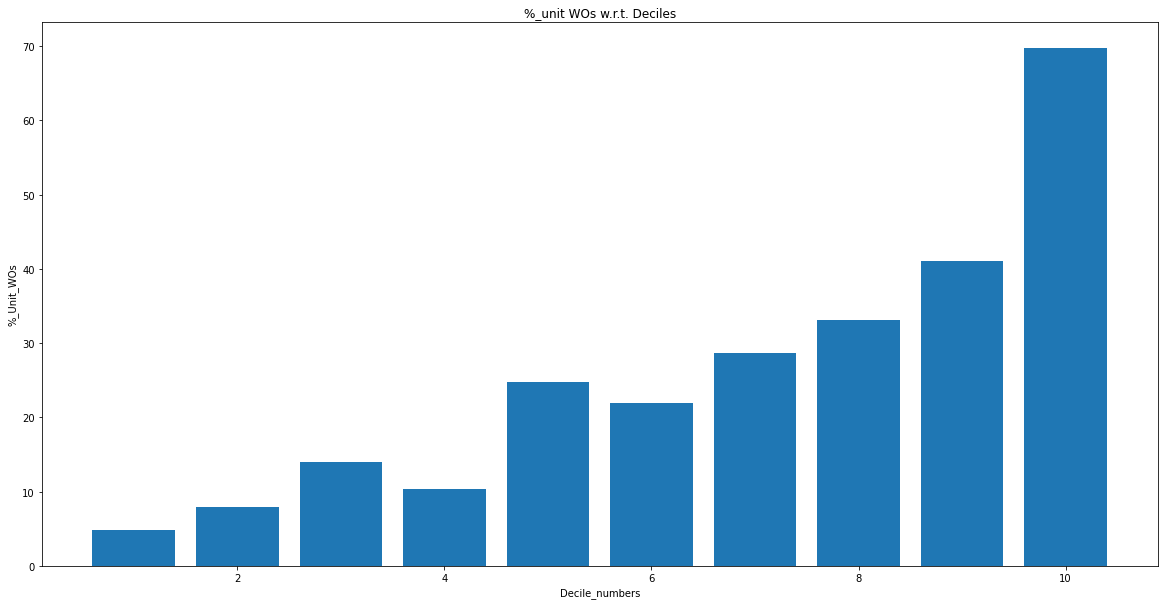

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile_numbers")
plt.ylabel("%_Unit_WOs")
plt.title("%_unit WOs w.r.t. Deciles")
plt.bar(final_df['Decile'],final_df['%_Unit_WriteOff'])

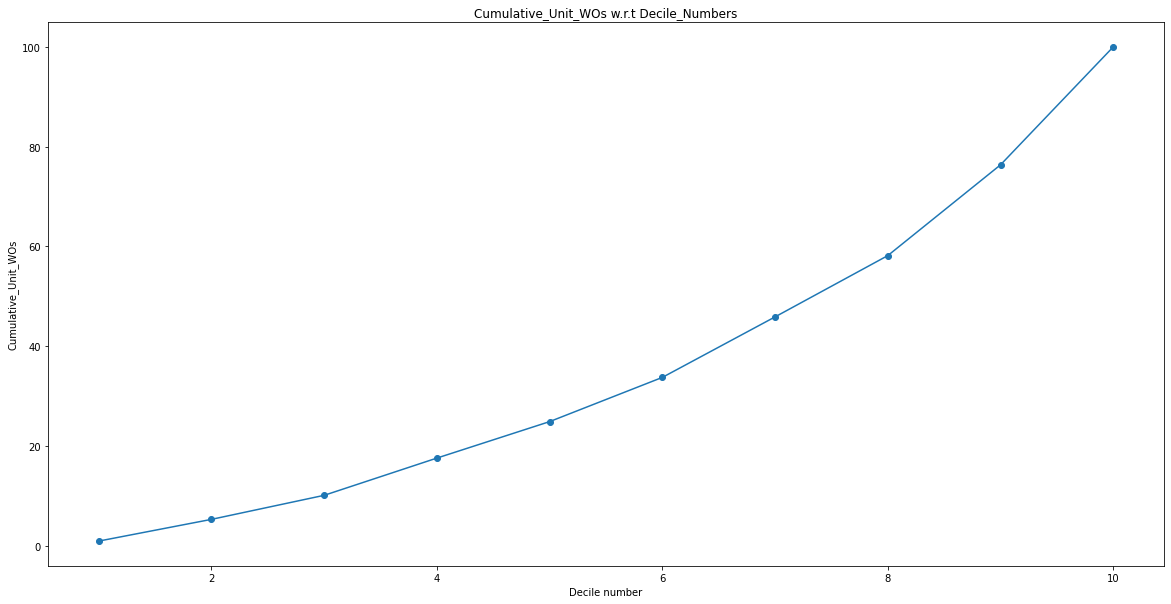

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Cumulative_Unit_WOs")
plt.title("Cumulative_Unit_WOs w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Cumulative_Unit_WOs'],marker='o')

# this graph looks correct to me. {small check - cg_10 = 100*(M_10/P) = 100.00 (we are correct)}

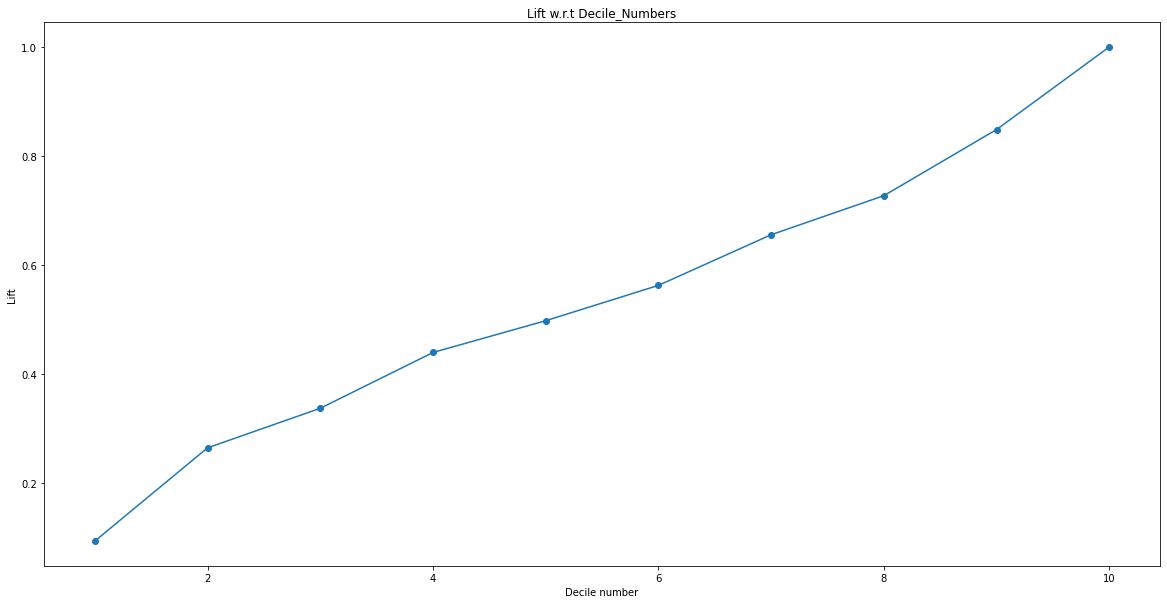

In [ ]:
plt.figure(figsize=(20,10))
plt.xlabel("Decile number")
plt.ylabel("Lift")
plt.title("Lift w.r.t Decile_Numbers")
plt.plot(final_df["Decile"], final_df['Lift'],marker='o')